In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Business Scenario

RestoreMasters is a car restoration company based in New York, USA.
Within short span of time, this company has become renowned for restoring vintage cars.
Their team takes great pride in each of their projects, no matter how big or small. They offer paint jobs, frame build-ups, engine restoration, body work etc. They restore cars of various origins including USA, Europe and Asia
The management wants to expand their business by increasing the capacity of the number of cars that can be restored.
They want to generate greater revenue for the company through cost cutting and providing a data driven approach to their current process.
They feel that the insights from existing data will help them in making data-driven decisions and also automate some of the key tasks in the process.
Key Objectives:
Getting Insights to make data-driven business decisions.
Example: Decision to decentralize restoration work with specialized facility.
Usage of Machine learning models that can help in automating important tasks.
Example:
Predicting the mileage of incoming cars
Automated classification of incoming cars <br>
<br>
Data Analysis Process

In [ ]:
df=pd.read_csv("/content/auto_mpg.csv")

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [ ]:
df.shape

(398, 9)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
df['horsepower'] = df.groupby(['cylinders', 'model_year'])['horsepower'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-1024-438423731e34>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['horsepower'] = df.groupby(['cylinders', 'model_year'])['horsepower'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [ ]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
df['origin']=df['origin'].astype('category')

In [ ]:
df['origin'].dtype

CategoricalDtype(categories=['europe', 'japan', 'usa'], ordered=False)

In [ ]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model_year         int64
origin          category
name              object
dtype: object

<Axes: >

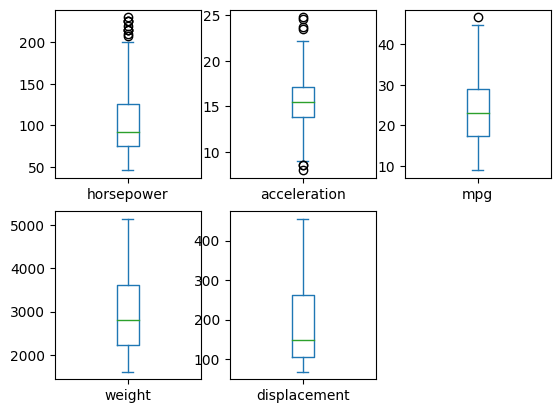

In [ ]:
plt.subplot(2,3,1)
df['horsepower'].plot(kind='box')
plt.subplot(2,3,2)
df['acceleration'].plot(kind='box')
plt.subplot(2,3,3)
df['mpg'].plot(kind='box')
plt.subplot(2,3,4)
df['weight'].plot(kind='box')
plt.subplot(2,3,5)
df['displacement'].plot(kind='box')

In [ ]:
df[['mpg','weight','displacement','acceleration','horsepower']].describe()

,mpg,weight,displacement,acceleration,horsepower
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,2970.424623,193.425879,15.568090,104.099083
std,7.815984,846.841774,104.269838,2.757689,38.336173
min,9.000000,1613.000000,68.000000,8.000000,46.000000
25%,17.500000,2223.750000,104.250000,13.825000,75.000000
50%,23.000000,2803.500000,148.500000,15.500000,92.000000
75%,29.000000,3608.000000,262.000000,17.175000,125.000000
max,46.600000,5140.000000,455.000000,24.800000,230.000000


In [ ]:
def find_outliers(col_name):
    Q1,Q3=df[col_name].quantile([0.25,0.75])
    IQR=Q3-Q1
    high=Q3+(1.5*IQR)
    low=Q1-(1.5*IQR)
    return(high,low)

high_hp,low_hp=find_outliers('horsepower')
print('Horsepower: ','upper limit: ',high_hp,' lower limit: ',low_hp)
high_acc,low_acc=find_outliers('acceleration')
print('Acceleration: ','upper limit: ',high_acc,' lower limit: ',low_acc)

df.loc[df['horsepower']>high_hp,'horsepower']=high_hp
df.loc[df['acceleration']>high_acc,'acceleration']=high_acc
df.loc[df['acceleration']<low_acc,'acceleration']=low_acc

Horsepower:  upper limit:  200.0  lower limit:  0.0
Acceleration:  upper limit:  22.2  lower limit:  8.8


<Axes: >

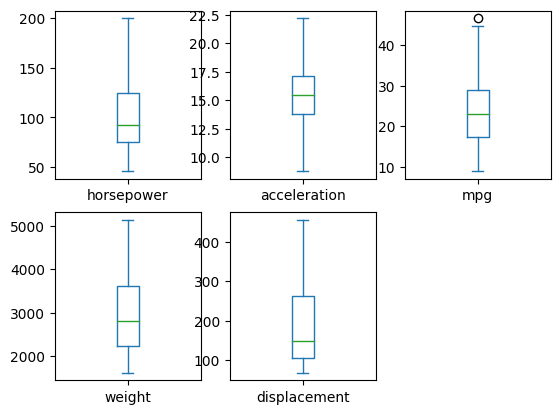

In [ ]:
plt.subplot(2,3,1)
df['horsepower'].plot(kind='box')
plt.subplot(2,3,2)
df['acceleration'].plot(kind='box')
plt.subplot(2,3,3)
df['mpg'].plot(kind='box')
plt.subplot(2,3,4)
df['weight'].plot(kind='box')
plt.subplot(2,3,5)
df['displacement'].plot(kind='box')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
li=[]
for i in (df['name']):
  li.append(i.split())



In [ ]:
li[1][0]

'buick'

In [ ]:
lis=[]
for i in range(len(df)):
    lis.append(li[i][0])

In [ ]:
lis

['chevrolet',
 'buick',
 'plymouth',
 'amc',
 'ford',
 'ford',
 'chevrolet',
 'plymouth',
 'pontiac',
 'amc',
 'dodge',
 'plymouth',
 'chevrolet',
 'buick',
 'toyota',
 'plymouth',
 'amc',
 'ford',
 'datsun',
 'volkswagen',
 'peugeot',
 'audi',
 'saab',
 'bmw',
 'amc',
 'ford',
 'chevy',
 'dodge',
 'hi',
 'datsun',
 'chevrolet',
 'toyota',
 'ford',
 'amc',
 'plymouth',
 'chevrolet',
 'ford',
 'amc',
 'chevrolet',
 'pontiac',
 'ford',
 'plymouth',
 'dodge',
 'ford',
 'pontiac',
 'amc',
 'chevrolet',
 'pontiac',
 'ford',
 'mercury',
 'opel',
 'peugeot',
 'fiat',
 'toyota',
 'datsun',
 'volkswagen',
 'plymouth',
 'toyota',
 'dodge',
 'volkswagen',
 'chevrolet',
 'ford',
 'chevrolet',
 'pontiac',
 'plymouth',
 'ford',
 'amc',
 'mercury',
 'buick',
 'oldsmobile',
 'chrysler',
 'mazda',
 'amc',
 'chevrolet',
 'ford',
 'plymouth',
 'volvo',
 'volkswagen',
 'peugeot',
 'renault',
 'ford',
 'datsun',
 'toyouta',
 'dodge',
 'toyota',
 'buick',
 'amc',
 'chevrolet',
 'ford',
 'dodge',
 'mercury',

In [ ]:
df['cars']=lis

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,22.2,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


In [ ]:
df['company']=df['name'].apply(lambda x:x.split()[0])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,ford
394,44.0,4,97.0,52.0,2130,22.2,82,europe,vw pickup,vw,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ford


In [ ]:
df['company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
df['company'].unique().size

37

In [ ]:
count_df=df.groupby('company')[['name']].count().sort_values('name',ascending=False).rename(columns={'name':'count'})

In [ ]:
count_df

,count
company,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


<Axes: xlabel='company'>

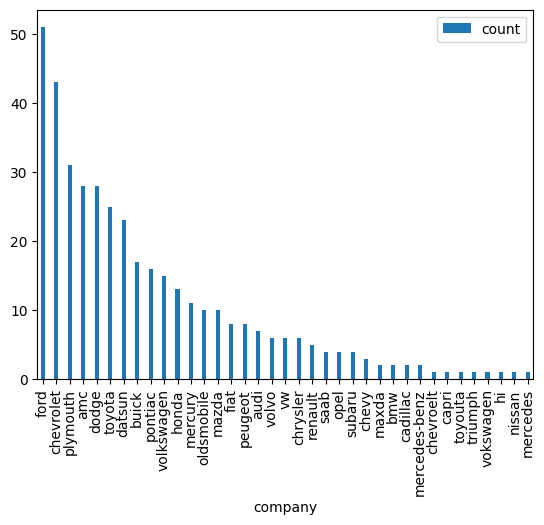

In [ ]:
count_df.plot(kind='bar',width=0.3)

In [ ]:
df['origin'].unique()

['usa', 'japan', 'europe']
Categories (3, object): ['europe', 'japan', 'usa']

In [ ]:
origin_count_df=df.groupby('origin')[['name']].count().sort_values('name',ascending=False).rename(columns={'name':'count'})
origin_count_df

,count
origin,
usa,249
japan,79
europe,70


<Axes: xlabel='origin'>

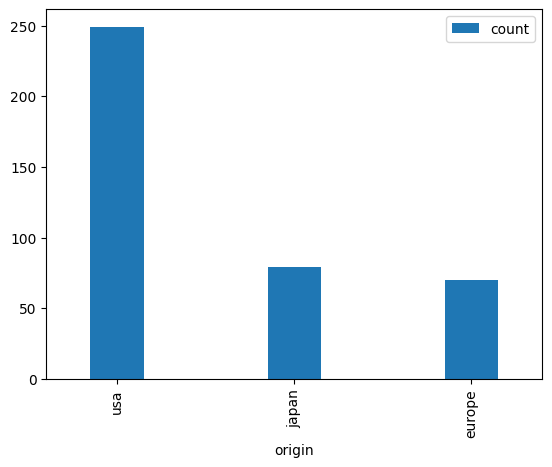

In [ ]:
origin_count_df.plot(kind='bar',width=0.3)

In [ ]:
origin_percent=(origin_count_df.loc['usa','count']/(origin_count_df['count'].sum())*100)
origin_percent

62.562814070351756

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford


In [ ]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
model_count_df=df.groupby('model_year')[['name']].count().sort_values('name',ascending=False).rename(columns={'name':'count'})
model_count_df

,count
model_year,
73,40
78,36
76,34
82,31
75,30
70,29
79,29
80,29
81,29


<Axes: xlabel='model_year'>

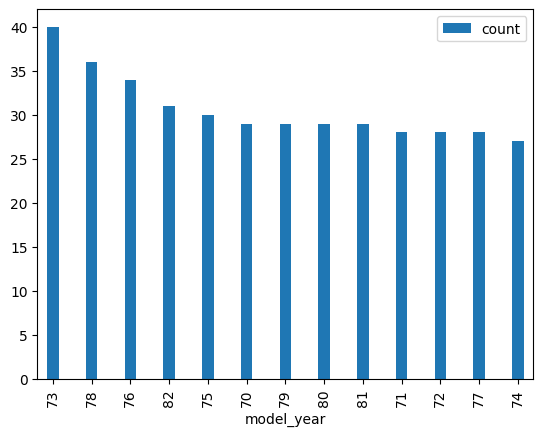

In [ ]:
model_count_df.plot(kind='bar',width=0.3)

In [ ]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [ ]:
cylinder_count_df=df.groupby('cylinders')[['name']].count().rename(columns={'name':'cars_count'})
cylinder_count_df

,cars_count
cylinders,
3,4
4,204
5,3
6,84
8,103


In [ ]:
cylinder_wise_percent=((cylinder_count_df.loc[4]['cars_count'])/(cylinder_count_df['cars_count'].sum())*100)
cylinder_wise_percent

51.256281407035175

<Axes: xlabel='cylinders', ylabel='mpg'>

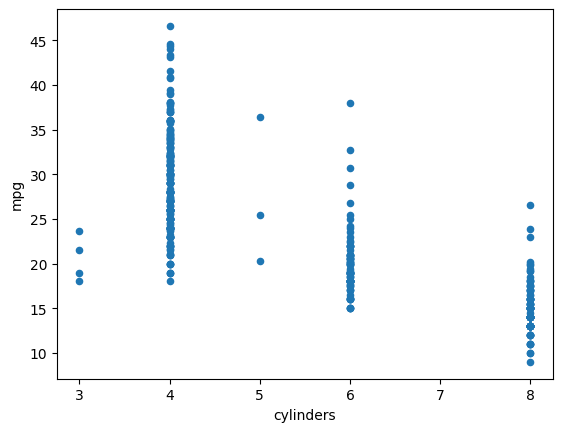

In [ ]:
df.plot(x='cylinders',y='mpg', kind='scatter')

In [ ]:
model_cylinder_df=df.groupby(['cylinders','model_year'])[['name']].count().rename(columns={'name':'cars_count'})
model_cylinder_df

cars_count
cylinders model_year            
3         72                   1
          73                   1
          77                   1
          80                   1
4         70                   7
          71                  13
          72                  14
          73                  11
          74                  15
          75                  12
          76                  15
          77                  14
          78                  17
          79                  12
          80                  25
          81                  21
          82                  28
5         78                   1
          79                   1
          80                   1
6         70                   4
          71                   8
          73                   8
          74                   7
          75                  12
          76                  10
          77                   5
          78                  12
          79                   6
          80                   2
          81                   7
          82                   3
8         70                  18
          71                   7
          72                  13
          73                  20
          74                   5
          75                   6
          76                   9
          77                   8
          78                   6
          79                  10
          81                   1

In [ ]:
model_cylinder_df.reset_index(inplace=True)
model_cylinder_df

,cylinders,model_year,cars_count
0,3,72,1
1,3,73,1
2,3,77,1
3,3,80,1
4,4,70,7
5,4,71,13
6,4,72,14
7,4,73,11
8,4,74,15
9,4,75,12


In [ ]:
model_pivot=pd.pivot_table(model_cylinder_df[['model_year','cylinders','cars_count']], index='model_year', columns='cylinders', values='cars_count', aggfunc=np.sum)
model_pivot

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,7.0,NaN,4.0,18.0
71,NaN,13.0,NaN,8.0,7.0
72,1.0,14.0,NaN,NaN,13.0
73,1.0,11.0,NaN,8.0,20.0
74,NaN,15.0,NaN,7.0,5.0
75,NaN,12.0,NaN,12.0,6.0
76,NaN,15.0,NaN,10.0,9.0
77,1.0,14.0,NaN,5.0,8.0
78,NaN,17.0,1.0,12.0,6.0


<Axes: xlabel='model_year'>

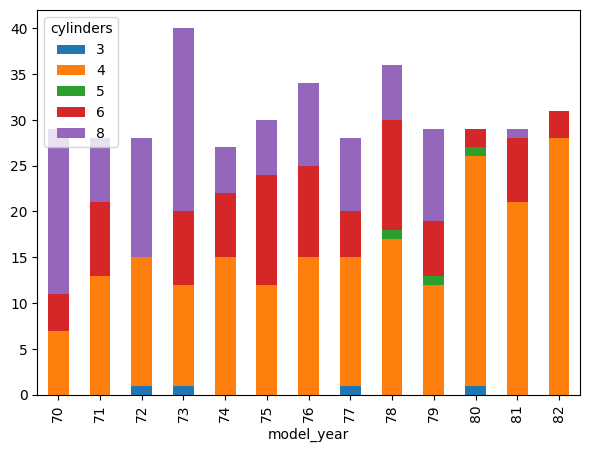

In [ ]:
model_pivot.plot(kind='bar', stacked='True',figsize=(7,5))

<Axes: xlabel='origin'>

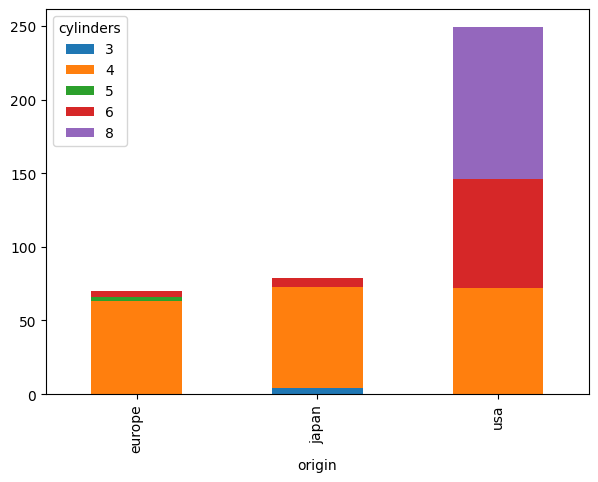

In [ ]:
origin_cylinder_df=df.groupby(['origin','cylinders'])[['name']].count().rename(columns={'name':'cars_count'})
origin_cylinder_df
origin_cylinder_df.reset_index(inplace=True)
origin_pivot=pd.pivot_table(origin_cylinder_df[['origin','cylinders','cars_count']], index='origin', columns='cylinders', values='cars_count', aggfunc=np.sum)
origin_pivot.plot(kind='bar', stacked='True',figsize=(7,5))

<Axes: xlabel='model_year'>

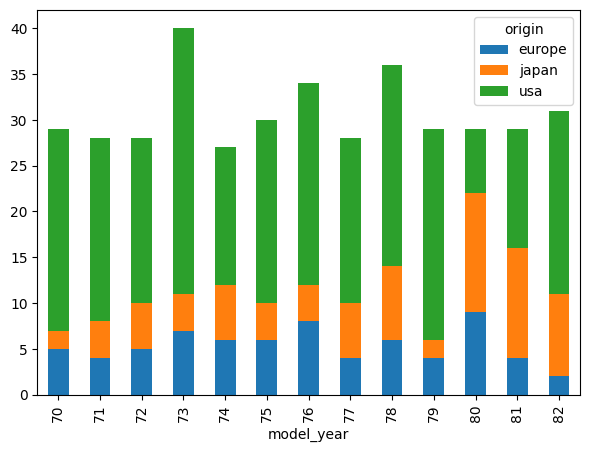

In [ ]:
model_origin_df=df.groupby(['model_year','origin'])[['name']].count().rename(columns={'name':'cars_count'})
model_origin_df
model_origin_df.reset_index(inplace=True)
modorg_pivot=pd.pivot_table(model_origin_df[['model_year','origin','cars_count']], index='model_year', columns='origin', values='cars_count', aggfunc=np.sum)
modorg_pivot.plot(kind='bar', stacked='True',figsize=(7,5))

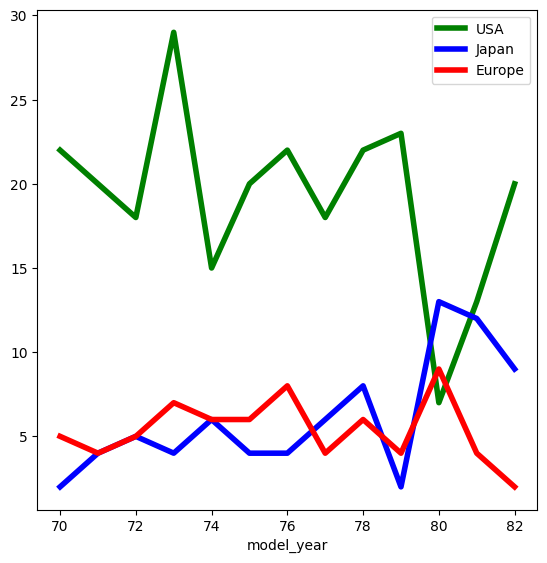

In [ ]:
fig = plt.figure(figsize=[5,5])
ax1 = fig.add_axes([0, 0, 1, 1]) #The dimensions [left, bottom, width, height] of the new Axes with respect to figure size
model_origin_df[model_origin_df['origin']=='usa'].plot( ax=ax1, x = "model_year", y = "cars_count",kind = "line",color='green', linewidth=4, label='USA' )
model_origin_df[model_origin_df['origin']=='japan'].plot(ax=ax1, x = "model_year", y = "cars_count",kind = "line",color='blue', linewidth=4, label='Japan' )
model_origin_df[model_origin_df['origin']=='europe'].plot(ax=ax1, x = "model_year", y = "cars_count",kind = "line",color='red', linewidth=4, label='Europe' )
plt.legend()

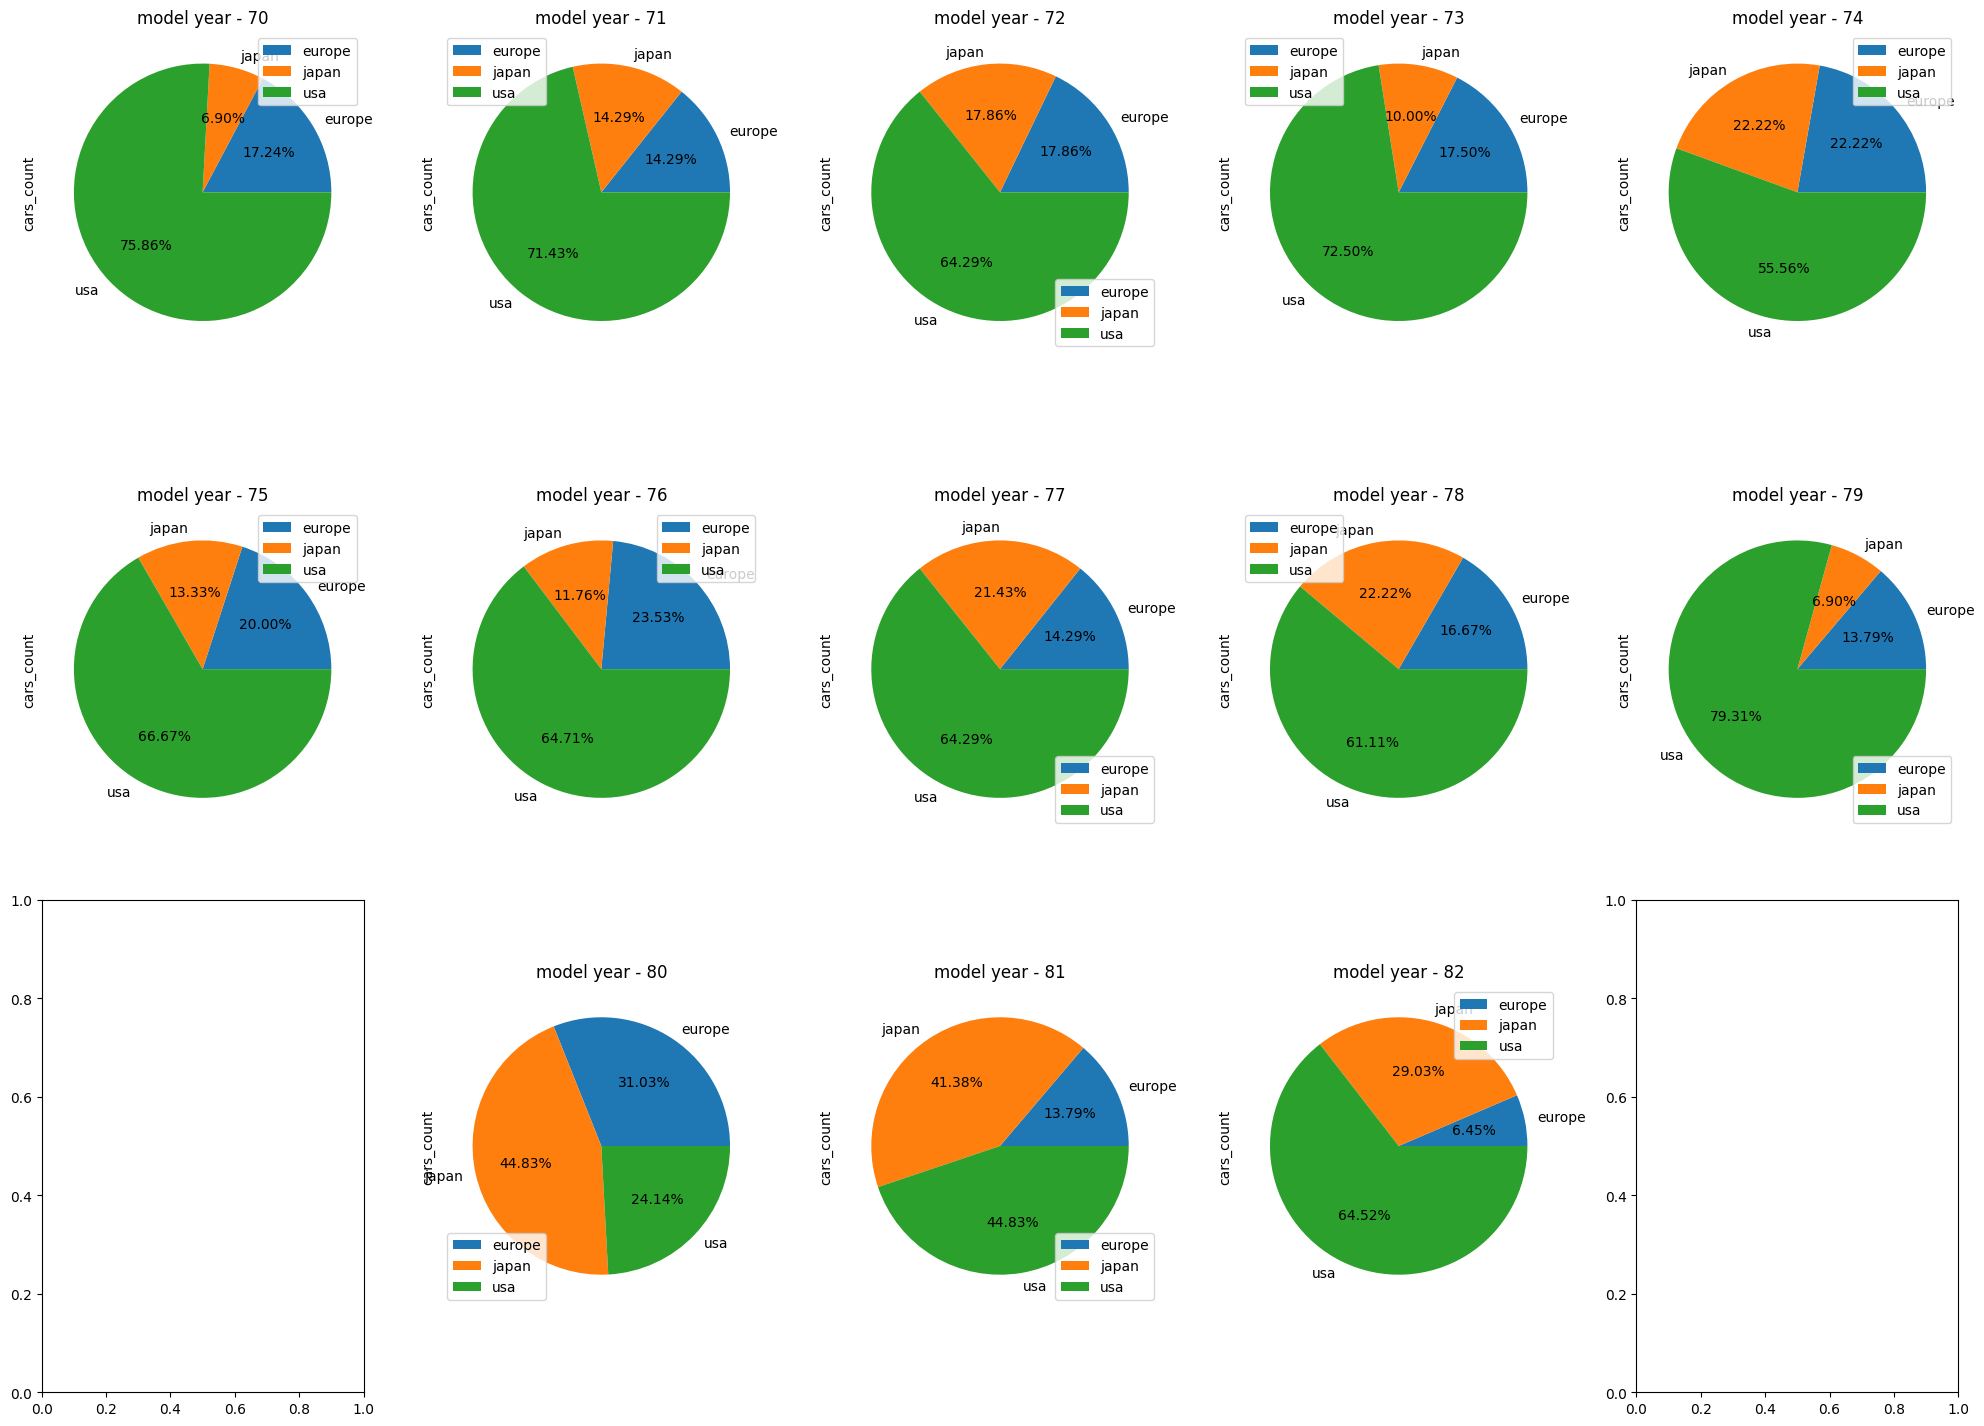

In [ ]:
fig,ax=plt.subplots(3,5,figsize=(20,15))
ax[0][0].set_title('model year - 70')
model_origin_df[model_origin_df['model_year']==70].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==70]['origin'], y='cars_count',ax=ax[0][0],autopct='%.2f%%')
ax[0][1].set_title('model year - 71')
model_origin_df[model_origin_df['model_year']==71].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==71]['origin'], y='cars_count',ax=ax[0][1],autopct='%.2f%%')
ax[0][2].set_title('model year - 72')
model_origin_df[model_origin_df['model_year']==72].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==72]['origin'], y='cars_count',ax=ax[0][2],autopct='%.2f%%')
ax[0][3].set_title('model year - 73')
model_origin_df[model_origin_df['model_year']==73].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==73]['origin'], y='cars_count',ax=ax[0][3],autopct='%.2f%%')
ax[0][4].set_title('model year - 74')
model_origin_df[model_origin_df['model_year']==74].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==74]['origin'], y='cars_count',ax=ax[0][4],autopct='%.2f%%')
ax[1][0].set_title('model year - 75')
model_origin_df[model_origin_df['model_year']==75].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==75]['origin'], y='cars_count',ax=ax[1][0],autopct='%.2f%%')
ax[1][1].set_title('model year - 76')
model_origin_df[model_origin_df['model_year']==76].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==76]['origin'], y='cars_count',ax=ax[1][1],autopct='%.2f%%')
ax[1][2].set_title('model year - 77')
model_origin_df[model_origin_df['model_year']==77].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==77]['origin'], y='cars_count',ax=ax[1][2],autopct='%.2f%%')
ax[1][3].set_title('model year - 78')
model_origin_df[model_origin_df['model_year']==78].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==78]['origin'], y='cars_count',ax=ax[1][3],autopct='%.2f%%')
ax[1][4].set_title('model year - 79')
model_origin_df[model_origin_df['model_year']==79].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==79]['origin'], y='cars_count',ax=ax[1][4],autopct='%.2f%%')
ax[2][1].set_title('model year - 80')
model_origin_df[model_origin_df['model_year']==80].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==80]['origin'], y='cars_count',ax=ax[2][1],autopct='%.2f%%')
ax[2][2].set_title('model year - 81')
model_origin_df[model_origin_df['model_year']==81].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==81]['origin'], y='cars_count',ax=ax[2][2],autopct='%.2f%%')
ax[2][3].set_title('model year - 82')
model_origin_df[model_origin_df['model_year']==82].plot(kind='pie',labels=model_origin_df[model_origin_df['model_year']==82]['origin'], y='cars_count',ax=ax[2][3],autopct='%.2f%%')
plt.tight_layout()

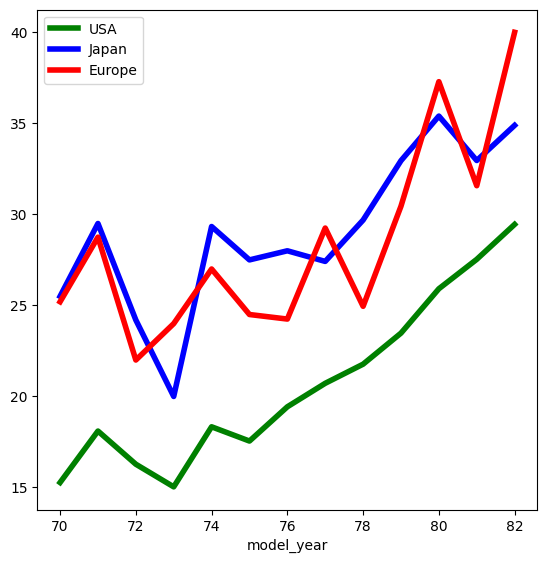

In [ ]:
mpg_df=df.groupby(['origin','model_year'])[['mpg']].mean().reset_index()
fig = plt.figure(figsize=[5,5])
ax = fig.add_axes([0, 0, 1, 1])
mpg_df[mpg_df['origin']=='usa'].plot( ax=ax, x = "model_year", y = "mpg",kind = "line",color='green', linewidth=4, label='USA' )
mpg_df[mpg_df['origin']=='japan'].plot(ax=ax, x = "model_year", y = "mpg",kind = "line",color='blue', linewidth=4, label='Japan' )
mpg_df[mpg_df['origin']=='europe'].plot(ax=ax, x = "model_year", y = "mpg",kind = "line",color='red', linewidth=4, label='Europe' )
plt.legend()

In [ ]:
df['origin']=df['origin'].astype('object')
mpg_pivot=pd.pivot_table(df, values ='mpg', index ='model_year', columns ='origin', aggfunc = [np.mean, np.max, np.min])
mpg_pivot

mean                         amax               amin        \
origin         europe      japan        usa europe japan   usa europe japan   
model_year                                                                    
70          25.200000  25.500000  15.272727   26.0  27.0  22.0   24.0  24.0   
71          28.750000  29.500000  18.100000   30.0  35.0  28.0   27.0  25.0   
72          22.000000  24.200000  16.277778   26.0  28.0  28.0   18.0  19.0   
73          24.000000  20.000000  15.034483   29.0  22.0  23.0   19.0  18.0   
74          27.000000  29.333333  18.333333   31.0  32.0  28.0   24.0  24.0   
75          24.500000  27.500000  17.550000   29.0  33.0  23.0   22.0  24.0   
76          24.250000  28.000000  19.431818   29.5  33.0  29.0   16.5  19.0   
77          29.250000  27.416667  20.722222   36.0  33.5  33.5   21.5  21.5   
78          24.950000  29.687500  21.772727   43.1  39.4  36.1   16.2  21.1   
79          30.450000  32.950000  23.478261   37.3  34.1  35.7   25.4  31.8   
80          37.288889  35.400000  25.914286   44.3  46.6  32.1   29.8  23.7   
81          31.575000  32.958333  27.530769   34.5  39.1  39.0   28.1  24.2   
82          40.000000  34.888889  29.450000   44.0  38.0  38.0   36.0  31.0   

                  
origin       usa  
model_year        
70           9.0  
71          12.0  
72          11.0  
73          11.0  
74          13.0  
75          13.0  
76          13.0  
77          15.0  
78          17.5  
79          15.5  
80          19.1  
81          17.6  
82          22.0

In [ ]:
mpg_pivot.reset_index(inplace=True)
mpg_pivot

model_year       mean                         amax               amin  \
origin                europe      japan        usa europe japan   usa europe   
0              70  25.200000  25.500000  15.272727   26.0  27.0  22.0   24.0   
1              71  28.750000  29.500000  18.100000   30.0  35.0  28.0   27.0   
2              72  22.000000  24.200000  16.277778   26.0  28.0  28.0   18.0   
3              73  24.000000  20.000000  15.034483   29.0  22.0  23.0   19.0   
4              74  27.000000  29.333333  18.333333   31.0  32.0  28.0   24.0   
5              75  24.500000  27.500000  17.550000   29.0  33.0  23.0   22.0   
6              76  24.250000  28.000000  19.431818   29.5  33.0  29.0   16.5   
7              77  29.250000  27.416667  20.722222   36.0  33.5  33.5   21.5   
8              78  24.950000  29.687500  21.772727   43.1  39.4  36.1   16.2   
9              79  30.450000  32.950000  23.478261   37.3  34.1  35.7   25.4   
10             80  37.288889  35.400000  25.914286   44.3  46.6  32.1   29.8   
11             81  31.575000  32.958333  27.530769   34.5  39.1  39.0   28.1   
12             82  40.000000  34.888889  29.450000   44.0  38.0  38.0   36.0   

                    
origin japan   usa  
0       24.0   9.0  
1       25.0  12.0  
2       19.0  11.0  
3       18.0  11.0  
4       24.0  13.0  
5       24.0  13.0  
6       19.0  13.0  
7       21.5  15.0  
8       21.1  17.5  
9       31.8  15.5  
10      23.7  19.1  
11      24.2  17.6  
12      31.0  22.0

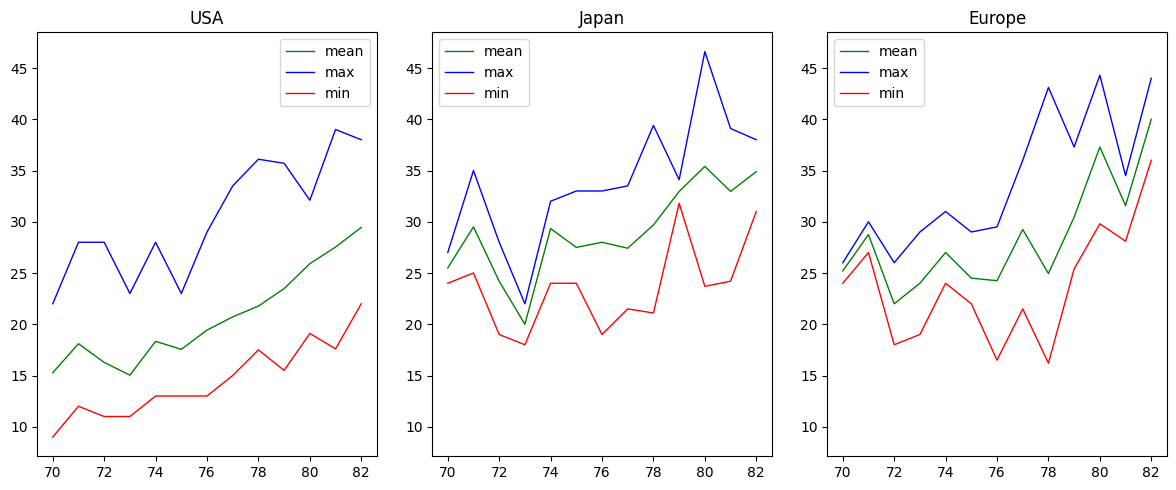

In [ ]:
plt.figure(figsize=(12,5))
ax1=plt.subplot(1,3,1)
plt.title('USA')
plt.plot(mpg_pivot['model_year'], mpg_pivot['mean']['usa'],color='green', linewidth=1, label='mean' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amax']['usa'],color='blue', linewidth=1, label='max' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amin']['usa'],color='red', linewidth=1, label='min' )
plt.legend()
plt.subplot(1,3,2, sharey=ax1)
plt.title('Japan')
plt.plot(mpg_pivot['model_year'], mpg_pivot['mean']['japan'],color='green', linewidth=1, label='mean' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amax']['japan'],color='blue', linewidth=1, label='max' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amin']['japan'],color='red', linewidth=1, label='min' )
plt.legend()
plt.subplot(1,3,3, sharey=ax1)
plt.title('Europe')
plt.plot(mpg_pivot['model_year'], mpg_pivot['mean']['europe'],color='green', linewidth=1, label='mean' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amax']['europe'],color='blue', linewidth=1, label='max' )
plt.plot(mpg_pivot['model_year'], mpg_pivot['amin']['europe'],color='red', linewidth=1, label='min' )
plt.legend()
plt.tight_layout()

In [ ]:
correlation_df=df[['mpg','displacement','horsepower','weight','acceleration']].corr()
correlation_df

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.787786,-0.831741,0.418293
displacement,-0.804203,1.000000,0.901515,0.932824,-0.548667
horsepower,-0.787786,0.901515,1.000000,0.874652,-0.693798
weight,-0.831741,0.932824,0.874652,1.000000,-0.422492
acceleration,0.418293,-0.548667,-0.693798,-0.422492,1.000000


<Axes: >

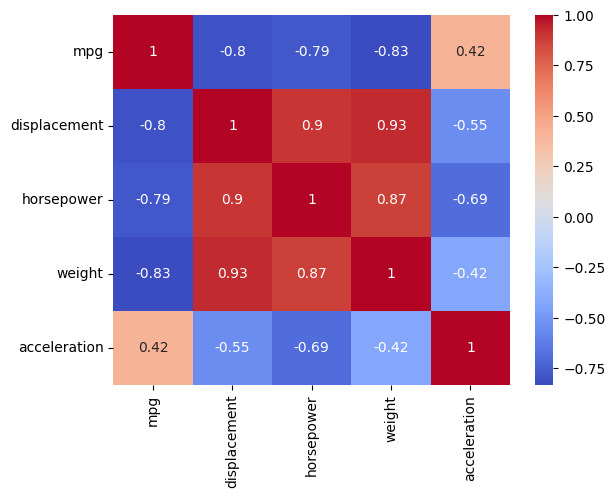

In [ ]:
sns.heatmap(correlation_df, cmap="coolwarm", annot=True)

In [ ]:
df.loc[(df['cylinders']==3),'car_type']='Hatchback'
df.loc[(df['cylinders']==4) & (df['mpg']>=30),'car_type']='Hatchback'
df.loc[(df['cylinders']==5),'car_type']='Sedan'
df.loc[(df['cylinders']==4) & (df['mpg']<30),'car_type']='Sedan'
df.loc[(df['cylinders']==6),'car_type']='SUV'
df.loc[(df['cylinders']==8),'car_type']='Sports'
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars,company,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet,Sports
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick,Sports
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth,Sports
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc,Sports
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,ford,Sedan
394,44.0,4,97.0,52.0,2130,22.2,82,europe,vw pickup,vw,vw,Hatchback
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,dodge,Hatchback
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ford,Sedan


In [ ]:
df.groupby('car_type')[['name']].count()

,name
car_type,
Hatchback,92
SUV,84
Sedan,119
Sports,103


In [ ]:
metrics_df=df.groupby('car_type')[['mpg','acceleration','horsepower','displacement']].mean()
metrics_df

,mpg,acceleration,horsepower,displacement
car_type,,,,
Hatchback,34.028261,16.476087,71.184712,97.097826
SUV,19.985714,16.263095,101.507937,218.142857
Sedan,25.278992,16.571429,84.460294,119.247899
Sports,14.963107,12.968932,156.475728,345.009709


<Axes: xlabel='car_type'>

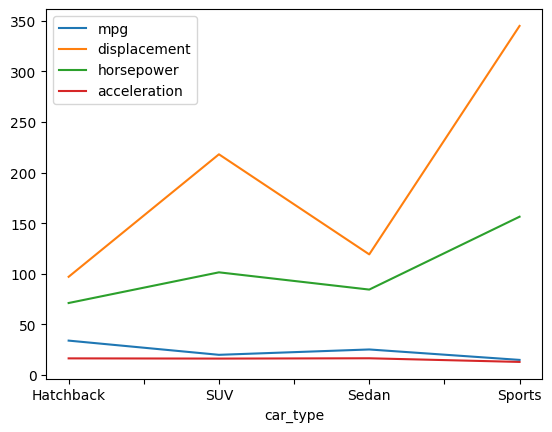

In [ ]:
metrics_df[['mpg','displacement','horsepower','acceleration']].plot()

In [ ]:
pd.crosstab(df['origin'],df['car_type'])

car_type,Hatchback,SUV,Sedan,Sports
origin,,,,
europe,20,4,46,0
japan,50,6,23,0
usa,22,74,50,103


In [ ]:
weights_df=df[df['car_type']!='Sports'][['name','weight']]
weights_df['new_weight']=weights_df['weight']+5
weights_df

,name,weight,new_weight
14,toyota corona mark ii,2372,2377
15,plymouth duster,2833,2838
16,amc hornet,2774,2779
17,ford maverick,2587,2592
18,datsun pl510,2130,2135
...,...,...,...
393,ford mustang gl,2790,2795
394,vw pickup,2130,2135
395,dodge rampage,2295,2300
396,ford ranger,2625,2630


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars,company,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet,Sports
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick,Sports
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth,Sports
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc,Sports
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,ford,Sedan
394,44.0,4,97.0,52.0,2130,22.2,82,europe,vw pickup,vw,vw,Hatchback
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,dodge,Hatchback
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ford,Sedan


In [ ]:
#Creating matrix of predictors
X = df.iloc[:, 1:8]
#Setting target
y = df.iloc[:, 0]
print(X)
print(y)

     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          22.2          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  
0       usa  
1       usa  
2       usa  
3      

In [ ]:
X=pd.get_dummies(X)
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,0,0,1
1,8,350.0,165.0,3693,11.5,70,0,0,1
2,8,318.0,150.0,3436,11.0,70,0,0,1
3,8,304.0,150.0,3433,12.0,70,0,0,1
4,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,0,1
394,4,97.0,52.0,2130,22.2,82,1,0,0
395,4,135.0,84.0,2295,11.6,82,0,0,1
396,4,120.0,79.0,2625,18.6,82,0,0,1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test);

In [ ]:
#Importing the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Checking the coefficient(slope) and intercepts
m = reg.coef_
c = reg.intercept_
m,c

(array([-0.36669643,  0.02475106, -0.03475517, -0.00627841,  0.11103444,
         0.75647496,  0.72383159,  1.2373965 , -1.9612281 ]),
 -15.513784986400651)

In [ ]:
#Predicting the target: mpg against the predictors in the training data set
#Predicted data stored in y_pred_train
y_pred_train = reg.predict(X_train)

In [ ]:
#Predicting the target: mpg against the predictors in the testing data set
#Predicted data stored in y_pred_test
y_pred_test = reg.predict(X_test)

In [ ]:
# Prediction Accuracy in terms of how close is the predicted value of target: mpg
# to the real value in training data set
from sklearn.metrics import r2_score
r2_S = r2_score(y_train, y_pred_train)
r2_S

0.821553967360475

In [ ]:
# Prediction Accuracy in terms of how close the predicted value of target: mpg
# to the real value in testing data set
from sklearn.metrics import r2_score
r2_S = r2_score(y_test, y_pred_test)
r2_S

0.8294001619272309

In [ ]:
# new instance of car to be serviced
car={'cylinders':[4], 'displacement':[110], 'horsepower':[70], 'weight':[2500], 'acceleration':[16.5],'model_year':[76], 'origin_europe':[0], 'origin_japan':[1], 'origin_usa':[0]}
print(reg.predict(pd.DataFrame(car)))

[28.17472294]


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cars,company,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevrolet,Sports
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,buick,Sports
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,plymouth,Sports
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,amc,Sports
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,ford,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,ford,Sedan
394,44.0,4,97.0,52.0,2130,22.2,82,europe,vw pickup,vw,vw,Hatchback
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,dodge,Hatchback
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ford,Sedan


In [ ]:
#Creating matrix of predictors
X = df.iloc[:, 0:8]
#Setting target
y =df.iloc[:, 11]
print(X)
print(y)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          22.2   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin  
0            70     usa  
1            70     usa  
2            70     usa  
3            70     usa  
4    

In [ ]:
X = pd.get_dummies(X)
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,22.2,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test);

In [ ]:
#Importing the algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [ ]:
#Fitting the model on training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#Predicting the target: mpg against the predictors in the training data set
#Predicted data stored in y_pred_train
y_pred_train = classifier.predict(X_train)

In [ ]:
#Predicting the target: mpg against the predictors in the training data set
#Predicted data stored in y_pred_train
y_pred_test = classifier.predict(X_test)

In [ ]:
#Training accuracy
from sklearn.metrics import accuracy_score
train_accuracy_score = accuracy_score(y_train, y_pred_train)
train_accuracy_score

0.8616352201257862

In [ ]:
#Training accuracy
from sklearn.metrics import accuracy_score
test_accuracy_score = accuracy_score(y_test, y_pred_test)
test_accuracy_score

0.8125

In [ ]:
# new instance of car to be serviced
car={'mpg':[10],'cylinders':[8], 'displacement':[200], 'horsepower':[100], 'weight':[2500], 'acceleration':[16.5],'model_year':[76], 'origin_europe':[0], 'origin_japan':[0], 'origin_usa':[1]}
print(classifier.predict(pd.DataFrame(car)))

['Sedan']
